In [1]:
import numpy as np
import pandas as pd
from pandas import DataFrame
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
import matplotlib.pylab as pylab
pylab.rcParams['figure.figsize'] = 10, 6

# Analyzing Geographic Advantages for Solar Business

## Background 

Solar is an important source of renewable energy. The market for solar products has been rocketing for past decade. Today the utility-scale solar electricity capacity in the US is over 40 times more than year 2000. And the trend is going to continue as solar still just accounts for a tiny fraction of total energy consumption. Also, the idea of saving the environment is getting more attentions these days. So now is a great time for entrepreneurs to look for business opportunities in this exciting industry.

<img src="SolarConsumption.png", width = 550, height = 350>


## Goals

Whether it is for business in solar manufacturing, installation, maintenance or sales, a successful business plan is the key, which, at a minimum requires identifying where to find customers. For solar business, it is very much tied to the geographic locations. Because geographic advantages can lead to a solid customer base, more resources for the business, or both. <strong>So this capstone project aims to provide analyses on the geographic advantages for new solar business.</strong>  

I hope to provide some insights to potential solar business owners when they are making location choices. For any specific location in the US, my analyses will be focused on: 

- Customer base: Are people in this area able to, and willing to pay for solar? 
- Resources: Does the area have rich solar radioation, suitable rooftops for solar panels, government incentives, etc.?

The final data product of this project will be an interactive application designed to provide visualizaion of the big picture as well as making customerized recommendations. 


## Data 

1. Dataset with zipcode resolution estimates of suitable area on 1,000 - 5,000 $m^2$ buildings' rooftops in the US for solar panel deployment, from National Renewable Energy Laboratory (http://en.openei.org/datasets/dataset/u-s-pv-suitable-rooftop-resources)

2. National direct normal solar irridiance from National Renewable Energy Laboratory (https://maps.nrel.gov/nsrdb-viewer)

2. Historical solar panel installation data by zipcode in the US. Dataset include publicly contributed data and data from Lawrence Berkeley National Lab, and is part of Nationational Renewable Energy Laboratory Open PV Project. (https://openpv.nrel.gov)

3. Spendings on home improvement for energy efficient purposes in the US, from the American Housing Survey.

4. Electricity Rate by zipcode in the US, from OpenEI.org (http://en.openei.org/datasets/dataset/u-s-electric-utility-companies-and-rates-look-up-by-zipcode-2015)

## Analysis
### 1. Suitable Rooftops for Solar Panels in US

In [3]:
# load data
roof = pd.read_csv('small.csv')
print(roof.shape)
roof.head()

(31904, 48)


,zip,locale,npln,nbld,pct.suitable,area_t0a0,area_t15a3,area_t15a4,area_t15a5,area_t15a6,...,bldg_t41a4,bldg_t41a5,bldg_t41a6,bldg_t41a7,bldg_t54a3,bldg_t54a4,bldg_t54a5,bldg_t54a6,bldg_t54a7,has.ground.truth
0,1001,Suburb Large,2496.0,5547.0,0.437714,15951.480000,39.920000,933.540000,2250.960000,1582.110000,...,207.0,382.0,197.0,28.0,0.0,0.0,1.0,0.0,0.0,True
1,1002,Suburb Large,8018.0,4356.0,0.721028,43845.157612,7585.030181,4260.529846,13336.445339,4641.703555,...,185.0,291.0,171.0,173.0,0.0,1.0,1.0,1.0,1.0,False
2,1003,Suburb Large,420.0,229.0,0.737981,2320.851777,381.173709,207.491616,728.537894,207.491616,...,8.0,14.0,8.0,8.0,0.0,0.0,0.0,0.0,0.0,False
3,1005,Rural Fringe,3312.0,1800.0,0.760034,14340.093897,3141.093226,1698.376928,5370.241449,1790.080483,...,73.0,143.0,73.0,91.0,0.0,0.0,0.0,0.0,0.0,False
4,1007,Rural Fringe,7242.0,3936.0,0.762852,31420.657277,6870.851777,3613.970490,11744.131455,3937.250168,...,162.0,309.0,159.0,201.0,1.0,1.0,1.0,1.0,1.0,False


In [4]:
print(roof.zip.nunique())

31904


**There are 31,904 unique zipcodes in the dataset**

In [5]:
# check for null values in the data frame
pd.isnull(roof).sum()

zip                   0
locale                0
npln                546
nbld                604
pct.suitable         94
area_t0a0           546
area_t15a3          546
area_t15a4          546
area_t15a5          546
area_t15a6          546
area_t15a7          546
area_t28a3          546
area_t28a4          546
area_t28a5          546
area_t28a6          546
area_t28a7          546
area_t41a3          546
area_t41a4          546
area_t41a5          546
area_t41a6          546
area_t41a7          546
area_t54a3          546
area_t54a4          546
area_t54a5          546
area_t54a6          546
area_t54a7          546
bldg_t0a0           546
bldg_t15a3          546
bldg_t15a4          546
bldg_t15a5          546
bldg_t15a6          546
bldg_t15a7          546
bldg_t28a3          546
bldg_t28a4          546
bldg_t28a5          546
bldg_t28a6          546
bldg_t28a7          546
bldg_t41a3          546
bldg_t41a4          546
bldg_t41a5          546
bldg_t41a6          546
bldg_t41a7      

**Will need to take care of the null values later**

In [6]:
# convert zipcode to longitude and latitude with uszipcode package
from uszipcode import ZipcodeSearchEngine

roof['zip'] = roof['zip'].astype(int).astype('str') # zipcodes need to be string
search = ZipcodeSearchEngine()
roof['lat'] = [search.by_zipcode(z)['Latitude'] for z in roof['zip']] 
roof['lon'] = [search.by_zipcode(z)['Longitude'] for z in roof['zip']] 
roof['state'] = [search.by_zipcode(z)['State'] for z in roof['zip']] 
roof['city'] = [search.by_zipcode(z)['City'] for z in roof['zip']]

In [8]:
# save the new dataframe
roof.to_csv('roof_converted.csv')

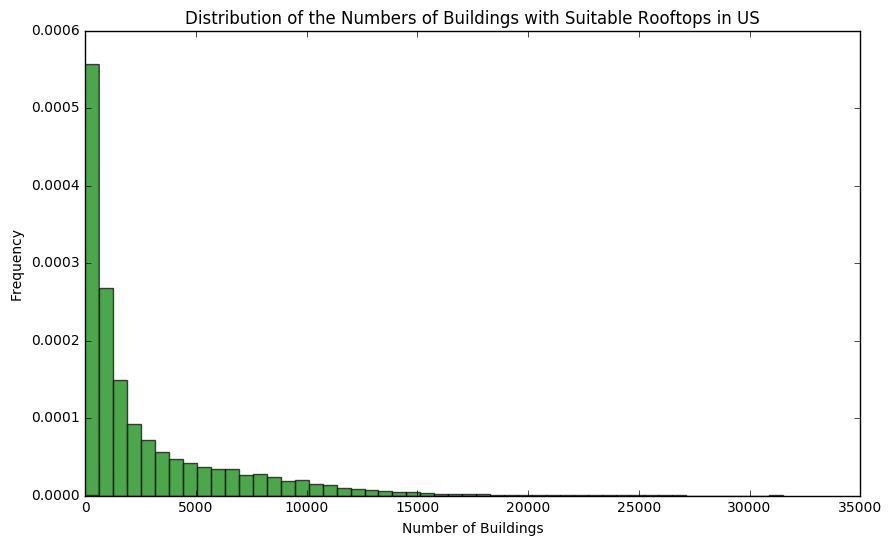

In [9]:
# Histogram of number of buildings
bld = roof['nbld'].dropna(axis = 0)

plt.hist(bld, 50, normed = 1, facecolor = 'green', alpha = 0.7)
plt.xlabel('Number of Buildings')
plt.ylabel('Frequency')
plt.title('Distribution of the Numbers of Buildings with Suitable Rooftops in US')

In [20]:
print('Max number of buildings: {}'.format(bld.max()))
print('Min number of buildings: {}'.format(bld.min()))
print('Median number of buildings: {}'.format(bld.median()))

Max number of buildings: 31529.0
Min number of buildings: 0.0
Median number of buildings: 1156.0


In [21]:
sum(bld == 0)

1780

**1780 zipcodes have 0 buildings with suitable rooftops**

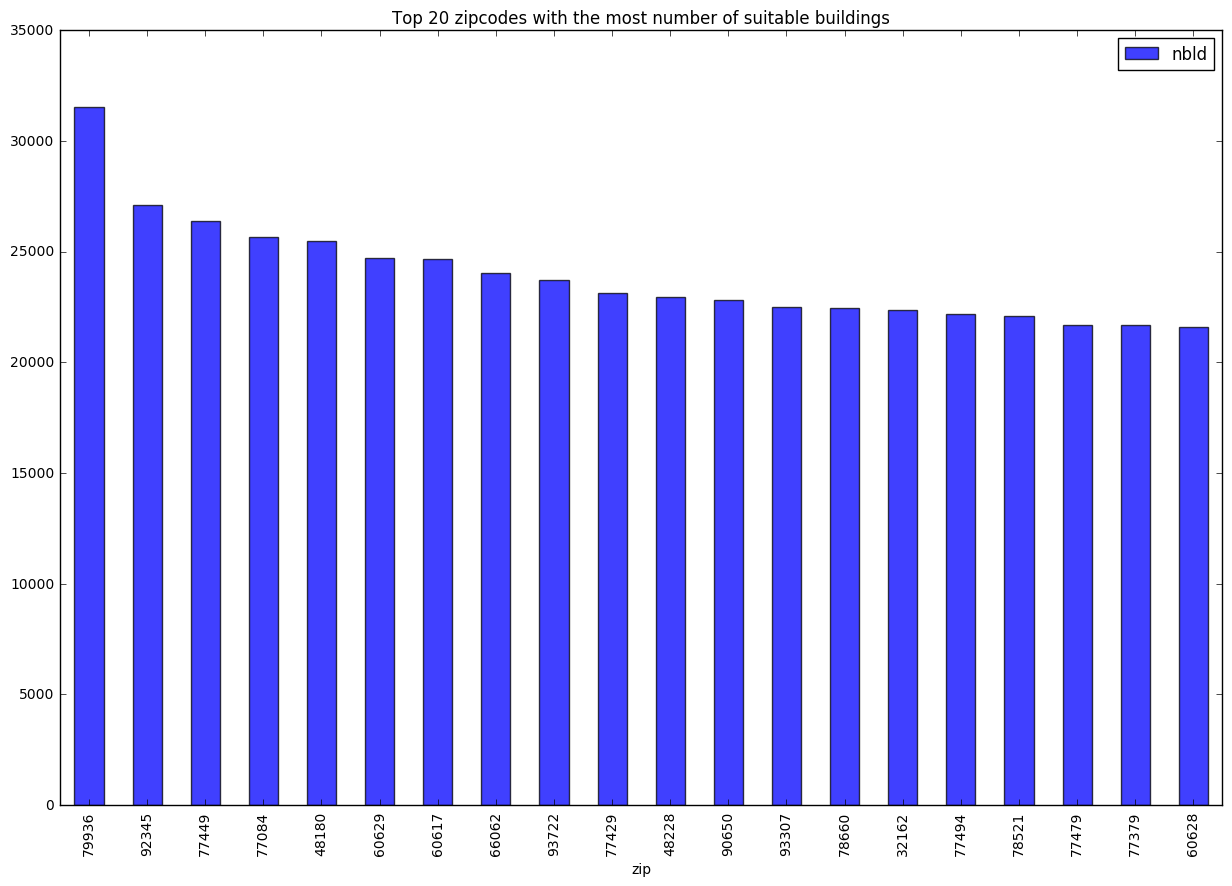

In [24]:
# Top zipcodes with the most of suitable buildings
roof_sorted = roof.sort_values(['nbld', 'zip'], ascending=(0, 1))
bld_zip = roof_sorted[['zip', 'nbld']].head(20)
bld_zip.plot(x = 'zip', y = 'nbld', kind='bar', alpha = 0.75, 
         title = 'Top 20 zipcodes with the most number of suitable buildings', 
         figsize=(15, 10))

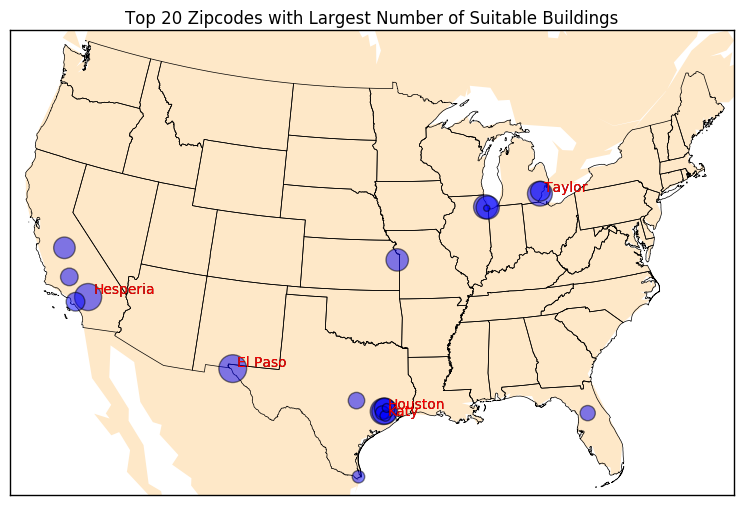

In [34]:
# draw the 20 zip codes from the bar plot in a map

import matplotlib.pyplot as plt
from mpl_toolkits.basemap import Basemap
from matplotlib.patches import Polygon

bld_coord = roof_sorted[['lon', 'lat', 'nbld', 'city']]
bld_coord = bld_coord.dropna(axis = 0, how = 'all').reset_index()

map = Basemap(llcrnrlon=-119,llcrnrlat=22,urcrnrlon=-64,urcrnrlat=49,
        projection='lcc',lat_1=33,lat_2=45,lon_0=-95)

# load the shapefile, use the name 'states'
map.readshapefile('st99_d00', name='states', drawbounds=True)
map.fillcontinents(color ='#fee8c8')

lons = bld_coord.lon.values.tolist()[0:20]
lats = bld_coord.lat.values.tolist()[0:20]
size = [400 - elm*20 for elm in bld_coord.index.values.tolist()[0:20]]
x,y = map(lons, lats)
# map.plot(x, y, c = 'b')
map.scatter(x, y, s=size, c='b', marker ='o', alpha=0.5, zorder=2)

labels = bld_coord.city.values.tolist()[0:5]
x_offsets = [30000, 35000, 25000, 20000, 30000]
y_offsets = [20000, 25000, -25000, 20000, 20000]
 
for label, xpt, ypt, x_offset, y_offset in zip(labels, x, y, x_offsets, y_offsets):
    plt.text(xpt+x_offset, ypt+y_offset, label)
for label, xpt, ypt, x_offset, y_offset in zip(labels, x, y, x_offsets, y_offsets):
    plt.text(xpt+x_offset, ypt+y_offset, label, color = 'r')

plt.title('Top 20 Zipcodes with Largest Number of Suitable Buildings')

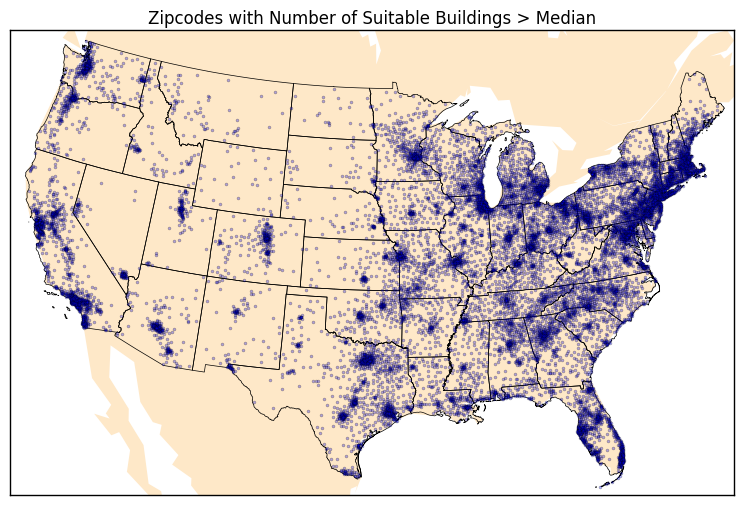

In [69]:
# draw the zip codes that don't have suitable buildings

bld_coord2 = bld_coord.loc[bld_coord['nbld'] > 1156]
bld_coord2 = bld_coord2.dropna(axis = 0, how = 'any').reset_index()

map2 = Basemap(llcrnrlon=-119,llcrnrlat=22,urcrnrlon=-64,urcrnrlat=49,
        projection='lcc',lat_1=33,lat_2=45,lon_0=-95)

# load the shapefile, use the name 'states'
map2.readshapefile('st99_d00', name='states', drawbounds=True)
map2.fillcontinents(color ='#fee8c8')

lons = bld_coord2.lon.values.tolist()
lats = bld_coord2.lat.values.tolist()
x,y = map(lons, lats)
map.plot(x, y, 'bo', markersize = 2, alpha = 0.3)

plt.title('Zipcodes with Number of Suitable Buildings > Median')

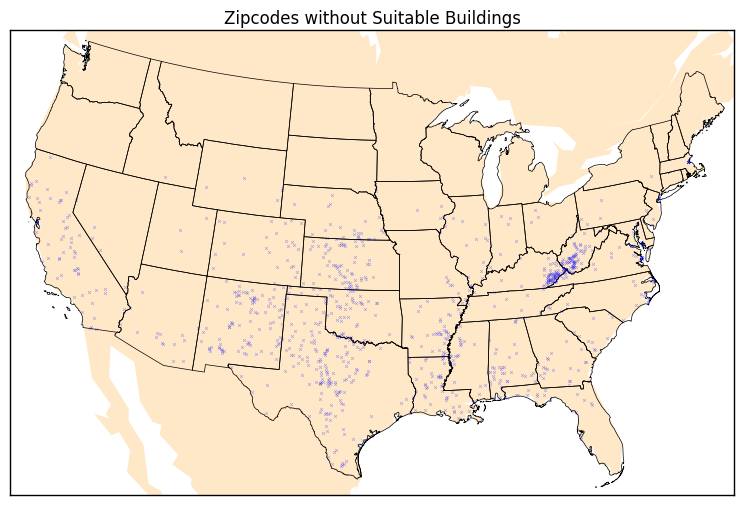

In [71]:
# draw the zip codes that don't have suitable buildings

bld_coord2 = bld_coord.loc[bld_coord['nbld'] == 0]
bld_coord2 = bld_coord2.dropna(axis = 0, how = 'any').reset_index()

map2 = Basemap(llcrnrlon=-119,llcrnrlat=22,urcrnrlon=-64,urcrnrlat=49,
        projection='lcc',lat_1=33,lat_2=45,lon_0=-95)

# load the shapefile, use the name 'states'
map2.readshapefile('st99_d00', name='states', drawbounds=True)
map2.fillcontinents(color ='#fee8c8')

lons = bld_coord2.lon.values.tolist()
lats = bld_coord2.lat.values.tolist()
x,y = map(lons, lats)
map.plot(x, y, 'bx', markersize = 2, alpha = 0.3)

plt.title('Zipcodes without Suitable Buildings')

### 2. Historical Solar Panel Installations in US

In [55]:
history = pd.read_csv('openpv_all.csv')
print(history.shape)
history.head()

/Users/yanfeiwu/anaconda/lib/python3.5/site-packages/IPython/core/interactiveshell.py:2717: DtypeWarning: Columns (2,5,8,10,12,13,14,15,16,20,23,25,26,27,28,32,50) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


(1020247, 81)


,state,date_installed,incentive_prog_names,type,size_kw,appraised,zipcode,install_type,installer,cost_per_watt,...,new_constr,effic_1,cust_county,tracking,inv_model_clean,mod_cost_real,inv_cost_real,bos_powerclerk_real,permitting_real,3rdparty
0,TX,12/12/2013,Austin Energy,uir,10.56,NaN,78702.0,residential,NaN,2.897777,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,TX,07/11/2014,Austin Energy,uir,12.72,NaN,78702.0,residential,NaN,3.144654,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,TX,01/17/2014,Austin Energy,uir,5.40,NaN,78702.0,residential,NaN,4.197330,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,TX,09/27/2012,Austin Energy,uir,7.50,NaN,78702.0,residential,NaN,3.750000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,TX,09/26/2012,Austin Energy,uir,5.00,NaN,78702.0,residential,NaN,3.850000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [56]:
pd.isnull(history).sum()

state                                0
date_installed                       5
incentive_prog_names            222289
type                                 5
size_kw                              5
appraised                       796211
zipcode                              5
install_type                     42581
installer                       317962
cost_per_watt                   257561
cost                             21533
lbnl_tts_version_year           222289
lbnl_tts                        222289
city                            221567
utility_clean                   227527
tech_1                          439328
model1_clean                    439328
county                           21595
annual_PV_prod                  239278
annual_insolation               239278
rebate                          633518
sales_tax_cost                  664938
tilt1                           636882
tracking_type                   494189
azimuth1                        656966
manuf2_clean             

In [57]:
# drop columns with all NA values
history = history.dropna(axis = 1,how = 'all')
print(history.shape)

(1020247, 39)


In [62]:
# remaining columns after dropna
print("Columns remained after dropping columns with all NA:")
print(history.columns.values)
print("  ")
print("Number of NA values in the remaining columns:")
print(pd.isnull(history).sum())

Columns remained after dropping columns with all NA:
['state' 'date_installed' 'incentive_prog_names' 'type' 'size_kw'
 'appraised' 'zipcode' 'install_type' 'installer' 'cost_per_watt' 'cost'
 'lbnl_tts_version_year' 'lbnl_tts' 'city' 'utility_clean' 'tech_1'
 'model1_clean' 'county' 'annual_PV_prod' 'annual_insolation' 'rebate'
 'sales_tax_cost' 'tilt1' 'tracking_type' 'azimuth1' 'manuf2_clean'
 'manuf3_clean' 'manuf1_clean' 'inv_man_clean'
 'reported_annual_energy_prod' 'year' 'pbi_length' 'utility' 'bipv_3'
 'bipv_2' 'bipv_1' 'new_constr' 'tracking' '3rdparty']
  
Number of NA values in the remaining columns:
state                                0
date_installed                       5
incentive_prog_names            222289
type                                 5
size_kw                              5
appraised                       796211
zipcode                              5
install_type                     42581
installer                       317962
cost_per_watt                

In [79]:
# removing data with invalid zipcode
history = history[history['zipcode']>=1001]

In [80]:
# save as a new dataframe
history.to_csv('history_cleaned.csv')